In [1]:
import numpy as np
from tensorflow import keras
from keras import layers
from keras.datasets import mnist
import matplotlib.pyplot as plt

In [2]:
def show_image(im):
  plt.imshow(im,cmap=plt.cm.summer)
  plt.show()

In [3]:
def show_image_vpp(im,value,prediction,probability):
  plt.imshow(im,cmap=plt.cm.summer)
  plt.show()
  print("the value is ",value)
  print("The predicted value is ",prediction," with probability: ",probability)

# Build a convolution network with
   1. Convolutions with filters of sizes 32, 64, 128 and kernel of size 3
   2. Use relu activiations
   3. use maxpooling of size 2
Do not forget to
   1. Flatten
   2. return a probability distribution

In [4]:
def build_model(input_shape):
    input = keras.Input(shape=(input_shape[1],input_shape[2],input_shape[3]))
    x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(input)
    x = layers.MaxPooling2D(pool_size=2)(x)
    x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
    x = layers.MaxPooling2D(pool_size=2)(x)
    x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
    x = layers.Flatten()(x)
    output = layers.Dense(10, activation="softmax")(x)
    model = keras.Model(inputs=input,outputs=output)

    return model

# Train a categorical classification model

In [5]:
def train_model(model,train_tensors,train_labels):
    model.compile(optimizer="rmsprop",loss="sparse_categorical_crossentropy",metrics=["accuracy"])
    model.fit(train_tensors,train_labels,epochs=5)

# Compute the predictions and their probabilities

In [6]:
def predict(model,test_tensors):
    predictions = model.predict(test_tensors)
    digit_predictions = np.argmax(predictions, axis=1)  # Extract class with highest probability
    digit_probability = np.max(predictions, axis=1)  # Extract the highest probability per prediction

    return digit_predictions,digit_probability

# Get the training and testing data

In [7]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Look at the shape of the images

In [8]:
train_shape = train_images.shape
train_shape

(60000, 28, 28)

# Look at the first Image

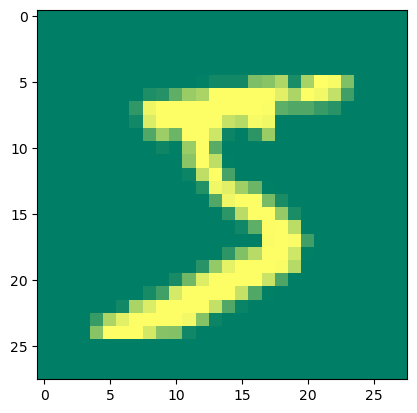

In [9]:
plt.imshow(train_images[0], cmap=plt.cm.summer)
plt.show()

# We need to reshape the tensors since, in vision, the last shape should represent the data of the pixels; here we have only one number since the pictures are in B&W

In [10]:
train_tensors = train_images.reshape((train_shape[0],train_shape[1],train_shape[2],1))
train_tensors.shape

(60000, 28, 28, 1)

# Normalize/scale the tensors between 0 and 1

In [11]:
train_tensors = train_tensors.astype("float32") / 255

# Now we can build the model
# We need to give the model the shape of the images

In [12]:
model = build_model(train_tensors.shape)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 128)         73856 

# Now we need to train the model

In [13]:
train_model(model,train_tensors,train_labels)

Epoch 1/5
1875/1875 [==============================] - 19s 10ms/step - loss: 0.1241 - accuracy: 0.9622
Epoch 2/5
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0418 - accuracy: 0.9874
Epoch 3/5
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0296 - accuracy: 0.9912
Epoch 4/5
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0237 - accuracy: 0.9924
Epoch 5/5
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0191 - accuracy: 0.9943


# The model is trained; let us see how well it does at recognizing digits
We first need to reshape the testing dataset and scale it

In [ ]:
test_shape = test_images.shape # test_shape = (10000, 28, 28)
test_tensors = test_images.reshape((test_shape[0], test_shape[1], test_shape[2], 1))
test_tensors = test_tensors.astype("float32") / 255
test_tensors

array([[[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]]],


       [[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
 

# Now we can make predictions and get probabilities

In [15]:
pred, prob = predict(model,test_tensors)

313/313 [==============================] - 1s 4ms/step


# Evaluate on the test data

In [16]:
test_loss, test_accuracy = model.evaluate(test_tensors, test_labels)
print(f"Test Accuracy: {test_accuracy:.4f}")

313/313 [==============================] - 2s 4ms/step - loss: 0.0243 - accuracy: 0.9923
Test Accuracy: 0.9923


# Compute the number of wrong predictions

In [17]:
wrong_indices = np.where(pred != test_labels)[0]
print(f"Number of wrong predictions: {len(wrong_indices)}")

Number of wrong predictions: 77


# Display the first 10 wrong predictions

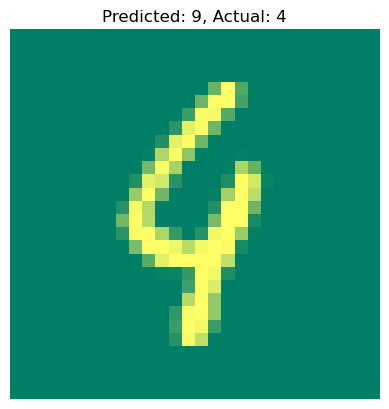

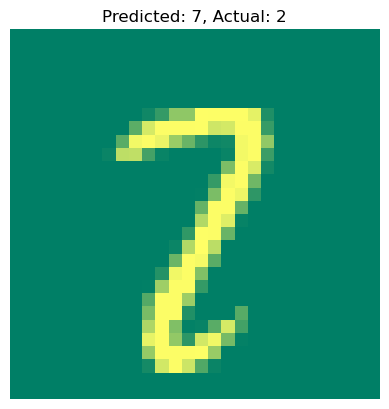

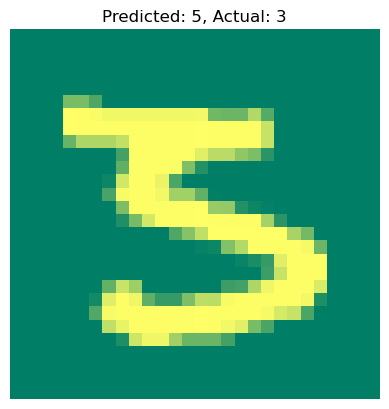

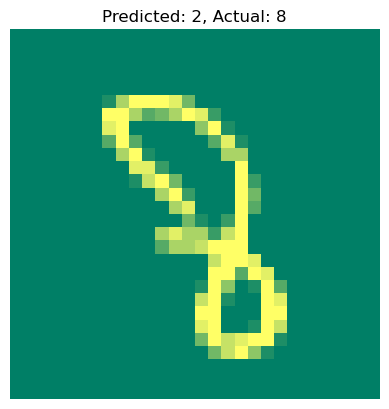

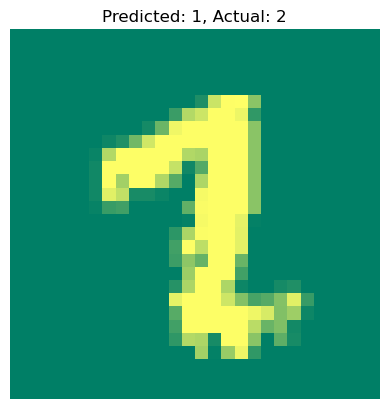

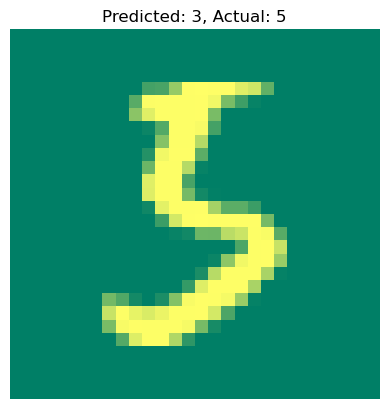

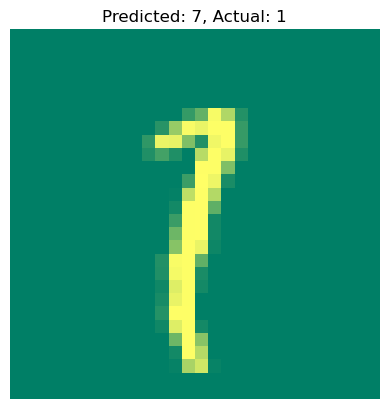

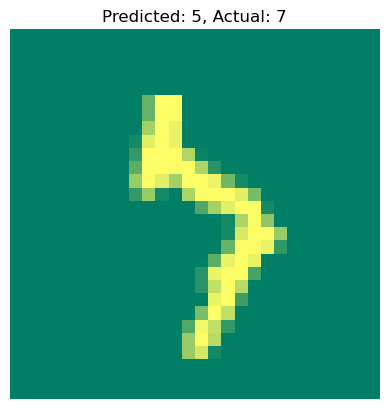

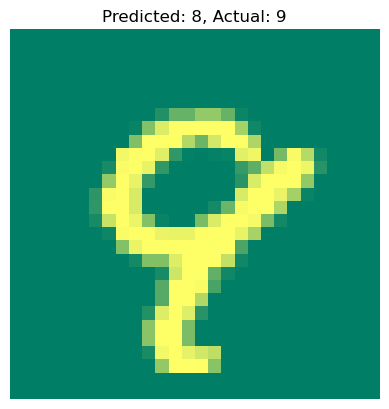

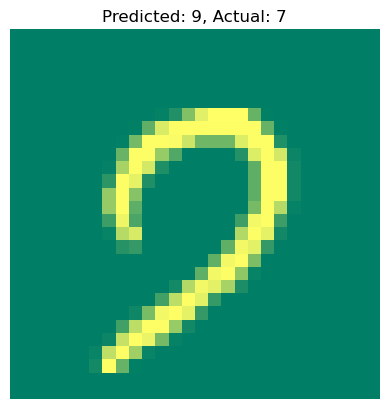

In [18]:
import matplotlib.pyplot as plt

# Display the first 10 incorrect predictions
for i in range(min(10, len(wrong_indices))):
    idx = wrong_indices[i]
    plt.imshow(test_images[idx].reshape(test_shape[1], test_shape[2]), cmap=plt.cm.summer)
    plt.title(f"Predicted: {pred[idx]}, Actual: {test_labels[idx]}")
    plt.axis("off")
    plt.show()
